## Tugas : UTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/wahyuarilsaputra/dataset/main/dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Lakukan analisa terhadap data pada https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi
  1. Metode KNN

  2. Metode pohon keputusan (Desision tree)

Naive Bayes

In [37]:
X = data.iloc[:,:4].values
y = data['Classification'].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [42]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [51]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\nAkurasi Dari metode Naive Bayes Clasification adalah: ', corrPred/(cm.sum()))    

Correct predictions:  14
False predictions 10

Akurasi Dari metode Naive Bayes Clasification adalah:  0.5833333333333334


Decision Tree

Membuat Classifier Decision Tree

In [54]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

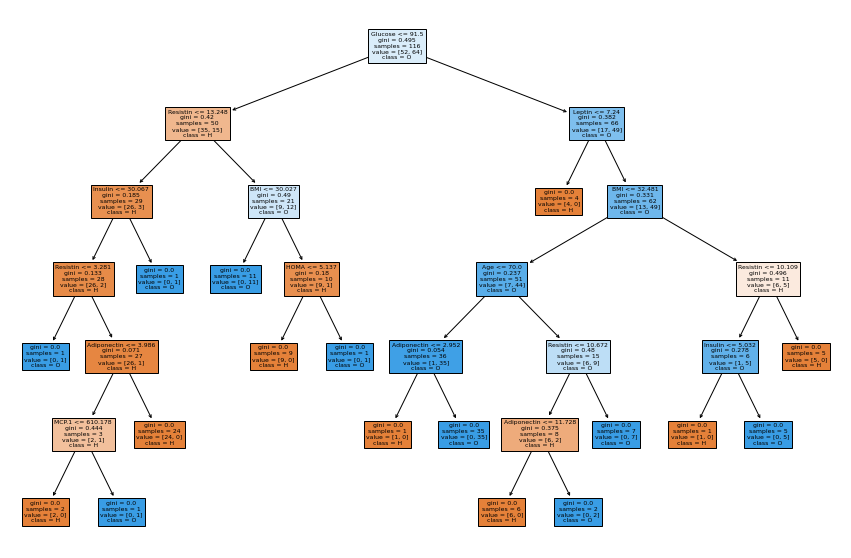

In [55]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[4] ,filled=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [9]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
test_pred_decision_tree = clf.predict(test_x)

In [12]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
print ('Akurasi Dari metode Decision Tree Clasification adalah: ', metrics.accuracy_score(test_lab, test_pred_decision_tree))

Akurasi Dari metode Decision Tree Clasification adalah:  0.574468085106383
